# Prompt Fission Neutron Spectrum

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

#import fission.py #-- my own library
sys.path.append('/Users/talou/git/evaluation-tools/')
import fission as fission
import fissionHistories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  2.0.0


First, we read the default CGMF output.

In [3]:
h = fh.FissionHistories ("cgmf-histories.dat", fmt="new")

Neutron energies in the center-of-mass and laboratory reference frames can be obtained as:

In [4]:
Ecm  = h.getNeutronEcm()
Elab = h.getNeutronElab()

Extracting the list of neutron energies in the center-of-mass frame of the emitting fragment for the fission event number 154:

In [5]:
Ecm[154]

[0.746, 0.582, 0.593, 1.111]

All neutron energies can then be binned in histograms, and analyzed and plotted that way. The `CGMF` python package **fissionHistories** come with a function to directly extract PFNS:

In [6]:
eout,pfns =h.pfns()

which returns two arrays: (1) the outgoing energy grid (in MeV); (2) the prompt fission neutron spectrum (in n/MeV/nu-bar). Here's how to plot the result:

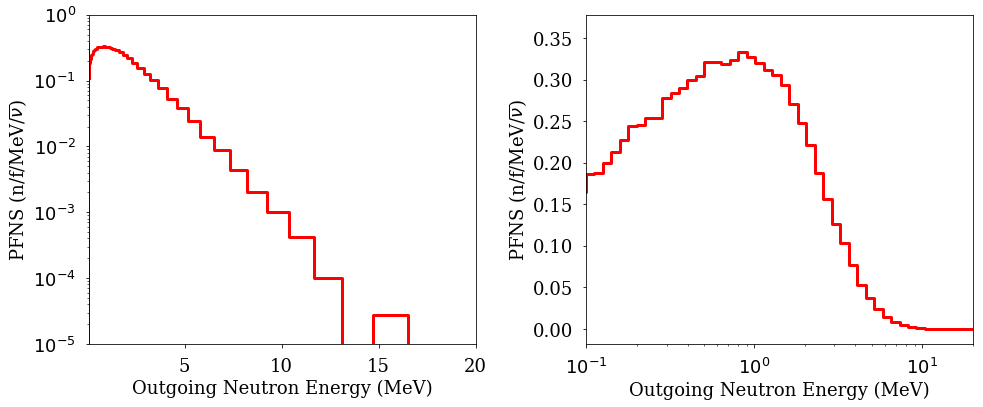

In [7]:
fig=figure(figsize(14,6))

plt.subplot(1,2,1)
plt.step(eout,pfns,'r-',linewidth=3)
plt.xlim(0.1,20.0)
plt.ylim(1e-5,1.0)
plt.xlabel("Outgoing Neutron Energy (MeV)")
plt.ylabel(r"PFNS (n/f/MeV/$\overline{\nu}$)")
plt.yscale('log')

plt.subplot(1,2,2)
plt.step(eout,pfns,'r-',linewidth=3)
plt.xlim(0.1,20.0)
plt.xscale('log')
plt.xlabel("Outgoing Neutron Energy (MeV)")
plt.ylabel(r"PFNS (n/f/MeV/$\overline{\nu}$)")

plt.tight_layout()
plt.show()

Average neutron energies can be simply obtained as:

In [8]:
print (h.meanNeutronEcm(),h.meanNeutronElab())

1.33338324555 2.10256863337


or, equivalently:

In [9]:
print (np.mean(Ecm.sum()), np.mean(Elab.sum()))

1.33338324555 2.10256863337
